
*NAME : RAM SRIKAR PUTCHA*

*NUID: 002304724*


---
# <center>**CAUSALITY ON THE TWINS DATASET**<center>
---

## DATASET:

The TWINS dataset is another well-known dataset often used in the study of causal inference. It typically includes data on twin births and is used to examine the causal impact of various interventions or conditions on outcomes like birth weight, health at birth, mortality, and long-term developmental outcomes. The key feature of the TWINS dataset that makes it valuable for causal analysis is the presence of both identical (monozygotic) and fraternal (dizygotic) twins, which allows researchers to control for a range of genetic and environmental factors.

In causal inference studies, the TWINS dataset can be particularly useful for understanding the effects of different prenatal and postnatal interventions or circumstances because twins share many confounding variables by virtue of being born to the same mother at the same time. This natural "pairing" in the data can be leveraged to control for many unobserved confounders, making it a powerful tool for causal analysis.

In [8]:
import pandas as pd

# URL for the TWINS dataset
url = "https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/TWINS/twin_pairs_X_3years_samesex.csv"

# Load the dataset into a pandas DataFrame
twins_data = pd.read_csv(url)

# Display the first few rows of the DataFrame to verify it loaded correctly
print(twins_data.head())

   Unnamed: 0.1  Unnamed: 0  pldel  birattnd  brstate  stoccfipb  mager8  \
0             0           0    1.0       1.0        1          1       3   
1             1           1    1.0       1.0        1          1       3   
2             2           2    1.0       1.0        1          1       5   
3             3           3    1.0       1.0        1          1       4   
4             4           4    1.0       1.0        1          1       5   

   ormoth  mrace  meduc6  ...  feduc6  infant_id_0  infant_id_1  dlivord_min  \
0     0.0      1     NaN  ...     NaN            1            0          NaN   
1     0.0      2     3.0  ...     NaN            7            6          2.0   
2     0.0      1     5.0  ...     3.0           11           10          NaN   
3     0.0      2     1.0  ...     1.0           15           14          4.0   
4     0.0      2     4.0  ...     NaN           23           22          NaN   

   dtotord_min  bord_0  bord_1  brstate_reg  stoccfipb_reg  mp

In [9]:
print(len(twins_data))

71345


In [10]:
# Display the column names
print("Column Names in the TWINS Dataset:")
print(twins_data.columns)

Column Names in the TWINS Dataset:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'pldel', 'birattnd', 'brstate',
       'stoccfipb', 'mager8', 'ormoth', 'mrace', 'meduc6', 'dmar', 'mplbir',
       'mpre5', 'adequacy', 'orfath', 'frace', 'birmon', 'gestat10', 'csex',
       'anemia', 'cardiac', 'lung', 'diabetes', 'herpes', 'hydra', 'hemo',
       'chyper', 'phyper', 'eclamp', 'incervix', 'pre4000', 'preterm', 'renal',
       'rh', 'uterine', 'othermr', 'tobacco', 'alcohol', 'cigar6', 'drink5',
       'crace', 'data_year', 'nprevistq', 'dfageq', 'feduc6', 'infant_id_0',
       'infant_id_1', 'dlivord_min', 'dtotord_min', 'bord_0', 'bord_1',
       'brstate_reg', 'stoccfipb_reg', 'mplbir_reg'],
      dtype='object')


---
## Column Description
---

Key areas of interest that can be explored in causal analyses with this dataset include:

### Health Risk Factors:
- Variables like anemia, cardiac, diabetes, eclamp, and others indicate specific health conditions that can be crucial in studying their impact on birth outcomes.

### Demographic Factors:
- Variables such as crace (race of child), csex (sex of child), mager8 (mother's age), and meduc6 (mother's education) provide demographic context that can be important in understanding differences in health outcomes.

### Birth and Pregnancy Details:
- Variables like birattnd (medical person attending birth), gestat10 (gestation categories), and dlivord_min (number of live births before twins) are directly related to the circumstances of birth and pregnancy.

### Behavioral Factors:
- Variables such as alcohol, tobacco, and drink5 (number of drinks/week) provide information on parental behaviors that could potentially impact birth outcomes.

### Socioeconomic and Geographic Factors:
- brstate (state of residence), feduc6 (father's education), and mplbir (mother's place of birth) can be used to study the socioeconomic and geographic influences on health outcomes.

With this detailed information, we can start formulating causal questions and hypotheses, and construct DAGs to represent the hypothesized relationships between these variables. This could involve exploring the effects of specific health risk factors on birth outcomes, the impact of socioeconomic status, or the influence of prenatal care, among other analyses.


---
## Descriptive Statistics, Missing Values, Distribution, Correlation Analysis
---

In [11]:
# Summary statistics for numerical variables
print("Descriptive Statistics for Numerical Variables:")
print(twins_data.describe())


Descriptive Statistics for Numerical Variables:
       Unnamed: 0.1    Unnamed: 0         pldel      birattnd       brstate  \
count  71345.000000  71345.000000  71321.000000  71231.000000  71345.000000   
mean   35672.000000  35672.000000      1.009787      1.052969     24.758189   
std    20595.671815  20595.671815      0.171234      0.333138     14.672375   
min        0.000000      0.000000      1.000000      1.000000      1.000000   
25%    17836.000000  17836.000000      1.000000      1.000000     11.000000   
50%    35672.000000  35672.000000      1.000000      1.000000     24.000000   
75%    53508.000000  53508.000000      1.000000      1.000000     37.000000   
max    71344.000000  71344.000000      5.000000      5.000000     59.000000   

          stoccfipb        mager8        ormoth         mrace        meduc6  \
count  71345.000000  71345.000000  69319.000000  71345.000000  67006.000000   
mean      27.584007      4.085570      0.209553      1.359002      3.407635   
std

In [12]:
# Checking for missing values
print("\nMissing Values in Each Column:")
print(twins_data.isnull().sum())


Missing Values in Each Column:
Unnamed: 0.1         0
Unnamed: 0           0
pldel               24
birattnd           114
brstate              0
stoccfipb            0
mager8               0
ormoth            2026
mrace                0
meduc6            4339
dmar                 0
mplbir             108
mpre5             1627
adequacy          3169
orfath           11822
frace            10260
birmon               0
gestat10             0
csex                 0
anemia            4240
cardiac           4240
lung              4240
diabetes          4240
herpes           10566
hydra             7086
hemo              7086
chyper            4240
phyper            4240
eclamp            4240
incervix          7086
pre4000           7086
preterm           7086
renal             4240
rh                5015
uterine           7720
othermr           4240
tobacco          19254
alcohol          17923
cigar6           19716
drink5           18319
crace                0
data_year            0
np

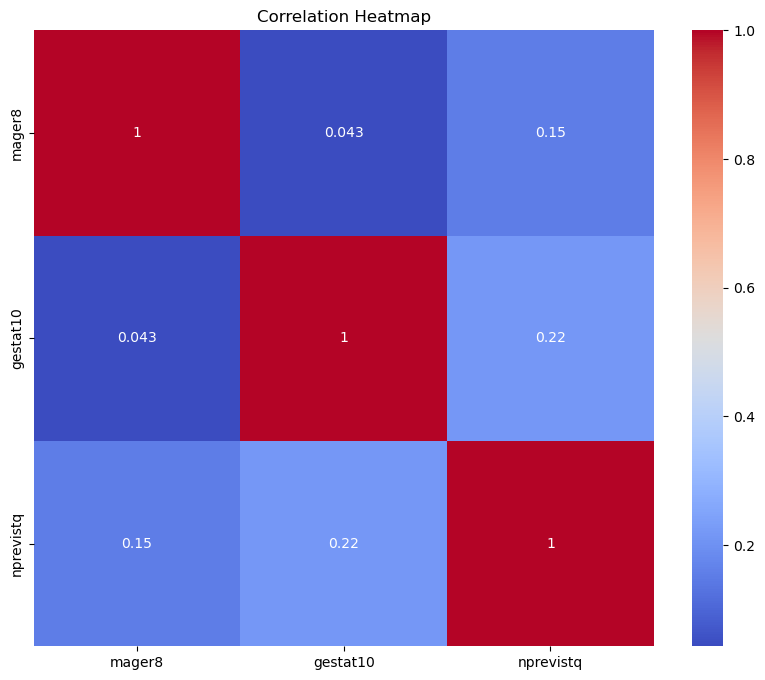

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation heatmap for selected numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(twins_data[['mager8', 'gestat10', 'nprevistq']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the heatmap, we can infer the following:

### Maternal Age (mager8) and Gestation Categories (gestat10):

- The correlation coefficient is around 0.043, which indicates a very weak positive relationship. This suggests that maternal age has little to no linear association with gestation categories in this dataset.

### Maternal Age (mager8) and Number of Prenatal Visits (nprevistq):

- The correlation coefficient is approximately 0.15, suggesting a weak positive relationship. It appears that as maternal age increases, the number of prenatal visits may slightly increase as well, but this relationship is not strong.

### Gestation Categories (gestat10) and Number of Prenatal Visits (nprevistq):

- The correlation coefficient is around 0.22, which implies a weak to moderate positive relationship. This might indicate that pregnancies with a higher number of prenatal visits tend to have gestations that fall into higher categories (potentially longer gestation periods), but the correlation is not strong enough to suggest a strong predictive relationship.

Overall, the heatmap indicates that while there are some positive relationships between the variables, they are weak, and it's unlikely that any of the variables strongly predict the others based on the correlation coefficients presented. However, it's essential to remember that correlation does not imply causation, and these relationships could be confounded by other factors not included in the heatmap. Additionally, weak correlations do not rule out the possibility of a causal relationship—they simply suggest that if such a relationship exists, it may not be linear or may be influenced by other variables.


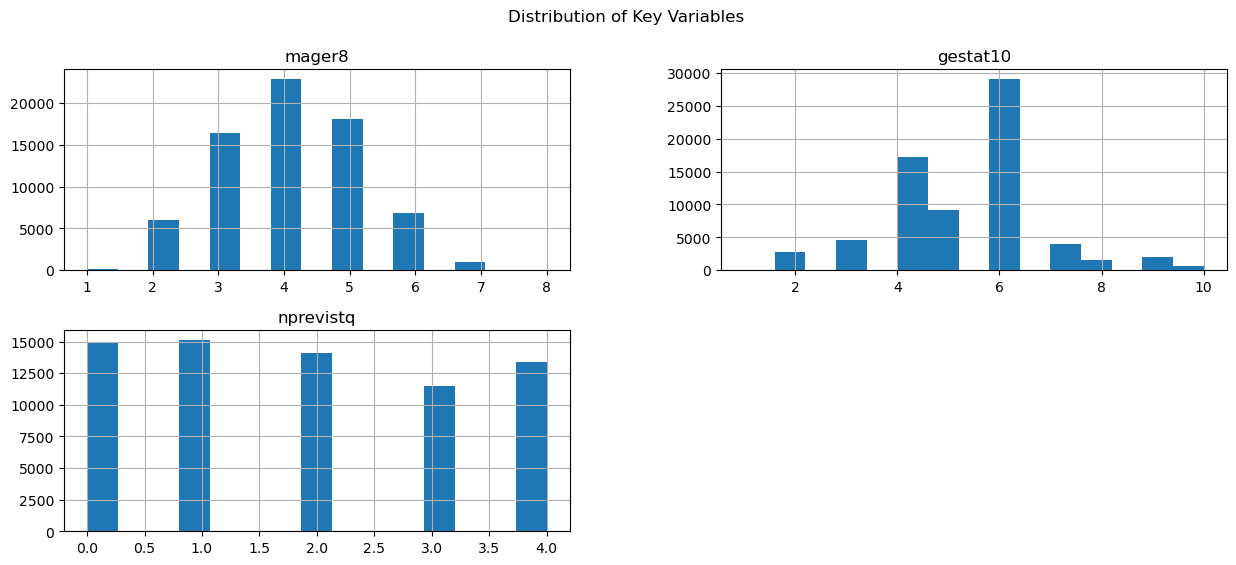

In [14]:
# Histograms for selected variables
import matplotlib.pyplot as plt
twins_data[['mager8', 'gestat10', 'nprevistq']].hist(bins=15, figsize=(15, 6))
plt.suptitle('Distribution of Key Variables')
plt.show()

The histograms provide a visual representation of the distribution of three key variables: maternal age (mager8), gestation categories (gestat10), and the quintile number of prenatal visits (nprevistq). Here's what we can infer from each of the graphs:

- Maternal Age (mager8):

The distribution of maternal age is multi-modal, suggesting there are several age groups where the number of observations peaks. This could indicate age groups that are more common among the population of mothers in the dataset.
There seems to be a relatively fewer number of observations for the lowest and highest age categories.

- Gestation Categories (gestat10):

The histogram of gestation categories shows a clear preference for category 6. This likely indicates a particular gestational age range that is most common among the births in the dataset, possibly around full-term births, assuming that the categories correspond to gestational age progressions.
There are significantly fewer observations in the earliest and latest gestation categories, indicating less frequent occurrences of preterm and post-term births.

- Number of Prenatal Visits (nprevistq):

The number of prenatal visits is shown in quintiles, with a fairly uniform distribution across the categories. This suggests that prenatal care was accessed by the mothers in a relatively balanced manner across different levels of care frequency.
There's no clear skewness towards more or fewer visits, which might point towards consistent prenatal care practices among the population sample represented in the dataset.


**Overall, these distributions provide insight into the demographics and healthcare utilization patterns of the population in the study. The modal age groups for mothers and the predominant gestational age category can be essential for understanding the context of other variables and outcomes in the dataset. Similarly, the spread of prenatal care visits may influence various health outcomes for both the mother and infants and could be a significant variable for causal analysis.**

---
## Direct Causality
---

**Causal Question:** Does prenatal care (nprevistq) directly affect birth weight?

For this simple DAG, we're looking at a direct relationship without considering any potential confounders or intermediate variables.


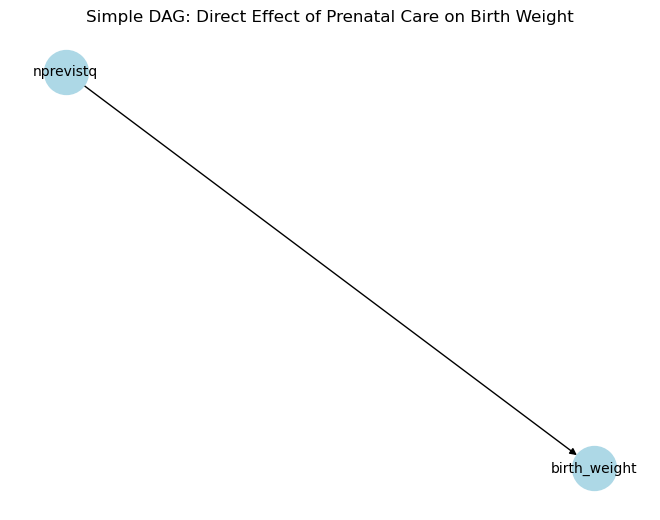

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G_simple = nx.DiGraph()

# Add nodes representing the variables
G_simple.add_nodes_from(['nprevistq', 'birth_weight'])

# Add edges representing the causal relationships
# Direct effect of prenatal care on birth weight
G_simple.add_edge('nprevistq', 'birth_weight')

# Draw the DAG
pos = nx.spring_layout(G_simple)
nx.draw(G_simple, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10)

# Show the plot
plt.title('Simple DAG: Direct Effect of Prenatal Care on Birth Weight')
plt.show()


In this simple DAG, we have two nodes: one for prenatal care (nprevistq) and one for birth weight. The directed edge from nprevistq to birth_weight represents the hypothesis that the amount and quality of prenatal care have a direct causal effect on the birth weight of infants. This is a foundational assumption in many studies that seek to understand the impact of healthcare access and quality on birth outcomes.

In causal inference terms, this DAG implies that we believe prenatal care is a potentially manipulable factor that, if changed, would lead to a change in birth weight. For example, if prenatal care were to be increased or improved, we would expect birth weight to increase, assuming that other factors are held constant.

This kind of DAG is quite straightforward and often serves as the starting point for more complex causal analyses. It makes the strong assumption that there are no unmeasured confounders, no measurement error, and no reverse causality. In reality, one would often need to account for additional variables, such as maternal health, environmental factors, and socioeconomic status, which might also affect birth weight and could be associated with the amount of prenatal care received. But for the sake of the simple DAG, we are temporarily setting aside these concerns.


---
## Including Confounders
---
**Causal Question:** How does prenatal care (nprevistq) affect birth weight while accounting for maternal age (mager8) and smoking during pregnancy (cigar6)?

This DAG considers two confounders—maternal age and smoking habits—which may affect both the treatment (prenatal care) and the outcome (birth weight).


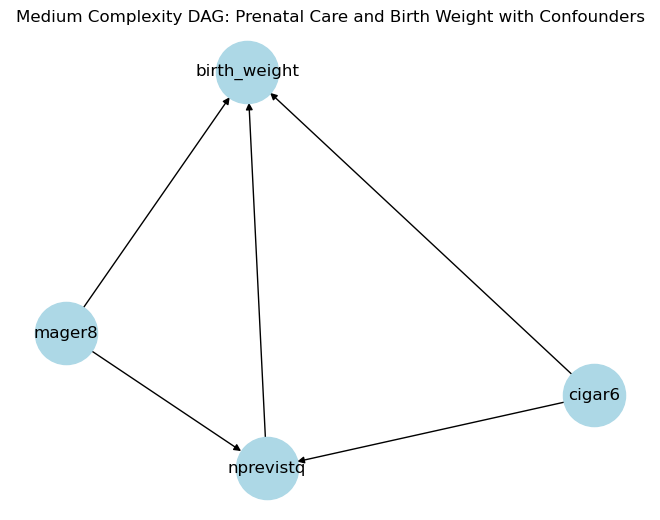

In [16]:
# Initialize a directed graph
G_medium = nx.DiGraph()

# Add nodes for the variables
G_medium.add_nodes_from(['nprevistq', 'birth_weight', 'mager8', 'cigar6'])

# Add edges for the causal relationships
# Maternal age and smoking could be confounders affecting both prenatal care and birth weight
G_medium.add_edge('mager8', 'nprevistq')
G_medium.add_edge('mager8', 'birth_weight')
G_medium.add_edge('cigar6', 'nprevistq')
G_medium.add_edge('cigar6', 'birth_weight')

# Direct effect of prenatal care on birth weight
G_medium.add_edge('nprevistq', 'birth_weight')

# Draw the DAG
pos = nx.spring_layout(G_medium)
nx.draw(G_medium, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12)

# Show the plot
plt.title('Medium Complexity DAG: Prenatal Care and Birth Weight with Confounders')
plt.show()


In this medium complexity DAG:

- The nodes represent the variables in our causal question.
- The edges represent the hypothesized causal relationships between these variables.
Specifically:

Maternal Age (mager8): We hypothesize that maternal age could influence both the amount of prenatal care a mother receives (nprevistq) and the birth weight of the child. Older or younger mothers might have different access to healthcare resources, which could influence prenatal care, and maternal age could directly impact pregnancy outcomes, including birth weight.

Smoking During Pregnancy (cigar6): This variable represents the mother's smoking habits during pregnancy. We hypothesize that smoking could negatively affect both the level of prenatal care (perhaps due to associations with socioeconomic status or health behavior) and the birth weight (as smoking is a known risk factor for lower birth weight).

Prenatal Care (nprevistq): This is our treatment or intervention variable. We're interested in how changes in prenatal care could affect the birth weight.

Birth Weight: This is our outcome variable. We want to estimate the effect of prenatal care on birth weight, taking into account the potential confounding effects of maternal age and smoking.

The added complexity in this DAG comes from considering confounders that might bias the estimated effect of prenatal care on birth weight if not appropriately accounted for in the analysis. In real-world studies, researchers would use statistical methods like regression adjustment or propensity score methods to control for these confounders.


---
## Mediation and Interaction
---
**Causal Question:** Does prenatal care (nprevistq) affect birth weight, mediated by maternal nutritional intake, and does this relationship vary by the level of maternal education (meduc6)?

This scenario is more complex because it includes a mediator (maternal nutritional intake, which we can represent as a hypothetical variable mat_nutrition) and an interaction effect with maternal education.

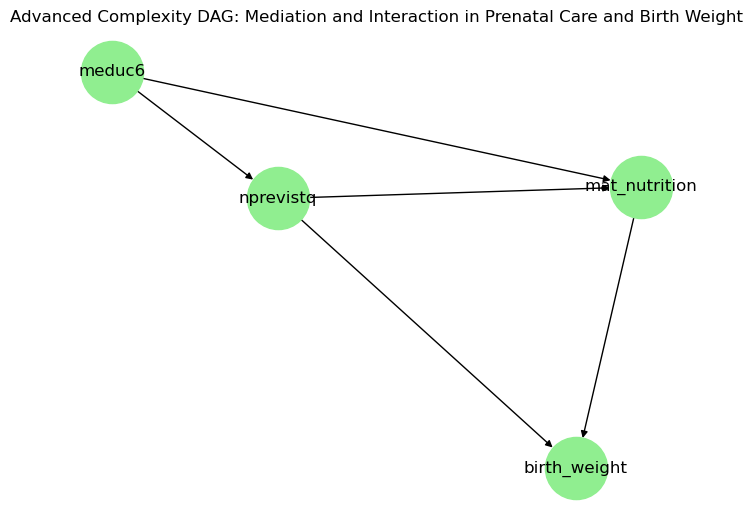

In [17]:
# Initialize a directed graph
G_advanced = nx.DiGraph()

# Add nodes for the variables
G_advanced.add_nodes_from(['nprevistq', 'birth_weight', 'mat_nutrition', 'meduc6'])

# Add edges for the causal relationships
# Prenatal care affects maternal nutrition, which in turn affects birth weight
G_advanced.add_edge('nprevistq', 'mat_nutrition')
G_advanced.add_edge('mat_nutrition', 'birth_weight')

# Prenatal care also has a direct effect on birth weight
G_advanced.add_edge('nprevistq', 'birth_weight')

# Maternal education moderates the effect of prenatal care
G_advanced.add_edge('meduc6', 'nprevistq')
G_advanced.add_edge('meduc6', 'mat_nutrition')

# Draw the DAG
pos = nx.spring_layout(G_advanced)
nx.draw(G_advanced, pos, with_labels=True, node_size=2000, node_color='lightgreen', font_size=12)

# Show the plot
plt.title('Advanced Complexity DAG: Mediation and Interaction in Prenatal Care and Birth Weight')
plt.show()


In this advanced complexity DAG:

Prenatal Care (nprevistq): Acts as the initial variable affecting both the mediator and the outcome directly.

Maternal Nutrition (mat_nutrition): Serves as a mediator that is influenced by prenatal care and, in turn, affects birth weight. This implies that part of the effect of prenatal care on birth weight is carried through improvements or changes in maternal nutrition.

Maternal Education (meduc6): It's introduced as a moderator, suggesting that the level of education may influence how prenatal care is administered or its efficacy, as well as the impact of maternal nutrition on the baby's birth weight. This can account for interaction effects where the impact of prenatal care might differ across different levels of maternal education.

Birth Weight: Remains the outcome variable of interest, influenced directly by prenatal care and indirectly through maternal nutrition.

This DAG is complex because it goes beyond direct effects to consider how variables may interact and influence one another along different pathways. This type of model is useful when we suspect that an outcome is the result of a chain of influences or when the effect of a treatment is not uniform across different subpopulations.


---
## Effect of Mother's Age and Education on Birth Weight
---
**Causal Question:** How do a mother's age (mager8) and education (meduc6) affect the birth weight of twins?

In this scenario, we hypothesize that maternal age and education have direct effects on birth weight. We may also consider that education could have an indirect effect by influencing health behaviors during pregnancy.


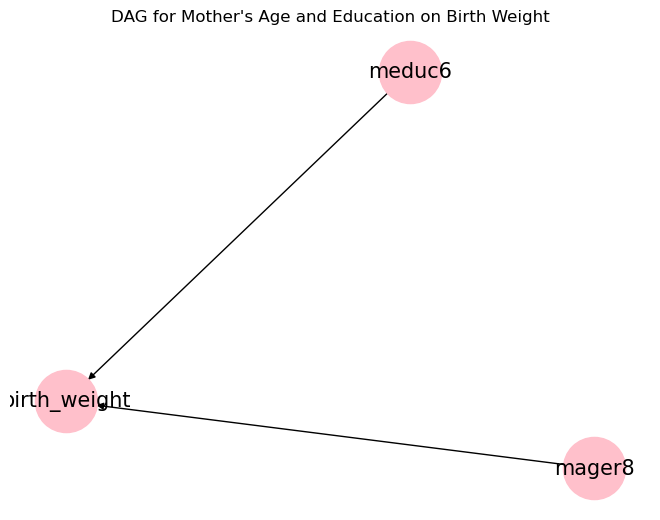

In [18]:
G_scenario4 = nx.DiGraph()

# Adding nodes and edges
G_scenario4.add_nodes_from(['mager8', 'meduc6', 'birth_weight'])
G_scenario4.add_edge('mager8', 'birth_weight')
G_scenario4.add_edge('meduc6', 'birth_weight')

# Draw the DAG
pos = nx.spring_layout(G_scenario4)
nx.draw(G_scenario4, pos, with_labels=True, node_size=2000, node_color='pink', font_size=15)
plt.title('DAG for Mother\'s Age and Education on Birth Weight')
plt.show()


---

## Relationship between State Healthcare Quality and Birth Outcomes
---
**Causal Question:** Does the quality of state healthcare, indicated by adequacy of prenatal care (adequacy), influence birth weight, with potential confounding by the mother's race (mrace)?

Here, the hypothesis is that state-level differences in healthcare quality affect birth weight, but we must account for potential confounding due to demographic factors like race.


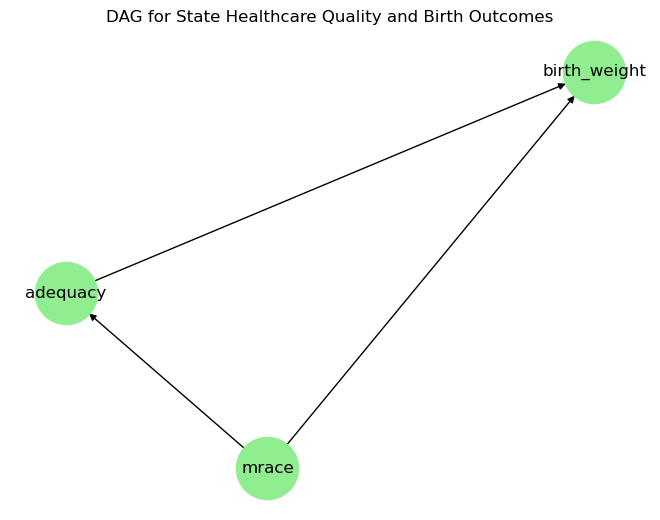

In [19]:
G_scenario6 = nx.DiGraph()

# Adding nodes and edges
G_scenario6.add_nodes_from(['adequacy', 'mrace', 'birth_weight'])
G_scenario6.add_edge('adequacy', 'birth_weight')
G_scenario6.add_edge('mrace', 'birth_weight')
G_scenario6.add_edge('mrace', 'adequacy')

# Draw the DAG
pos = nx.spring_layout(G_scenario6)
nx.draw(G_scenario6, pos, with_labels=True, node_size=2000, node_color='lightgreen', font_size=12)
plt.title('DAG for State Healthcare Quality and Birth Outcomes')
plt.show()


### Variables:

- **adequacy:** Represents the adequacy of prenatal care, which we're using as a proxy for the quality of state healthcare.
- **mrace:** The race of the mother, which could be associated with both the quality of healthcare received and the birth weight outcomes.
- **birth_weight:** The weight of the babies at birth, which is our outcome of interest.

### Hypothesized Relationships:

- **adequacy → birth_weight:** The pathway from the adequacy of prenatal care to birth weight suggests that higher quality prenatal care is hypothesized to lead to better birth outcomes. This reflects the direct impact of healthcare quality on infant health.
- **mrace → birth_weight:** The mother's race might have a direct association with birth weight due to a complex interplay of genetic, social, and environmental factors.
- **mrace → adequacy:** This edge represents the potential for racial disparities in access to or quality of healthcare. The mother's race may influence the level of healthcare received due to socioeconomic factors, potential systemic bias, or differences in healthcare practices across communities.

### DAG Interpretation:

This DAG posits that state healthcare quality, as measured by the adequacy of care, directly influences birth outcomes. However, it also recognizes the possible confounding effect of race. This confounding effect could occur if, for example, certain racial groups have systematic differences in access to quality care, which would then also be associated with different birth weights. By including race as a variable in the DAG, we acknowledge the need to control for it in any causal analysis to obtain an unbiased estimate of the effect of healthcare quality on birth weight.



---
## Estimating the Effect of Prenatal Care on the Likelihood of Preterm Birth Using Propensity Score Matching
---
Here’s how we can implement this:

- **Treatment Variable:** nprevistq (Number of prenatal visits).
- **Outcome Variable:** preterm (Indicator of preterm birth).
- **Confounders:** mager8 (Maternal age), meduc6 (Maternal education), cigar6 (Smoking during pregnancy).


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Logistic regression model
logit_model = LogisticRegression()

# Create a pipeline that first imputes the data then fits the model
pipeline = make_pipeline(imputer, logit_model)

# Confounders
X = twins_data[['mager8', 'meduc6', 'cigar6']]  
# Treatment: High prenatal care as treatment
y = twins_data['nprevistq'] > twins_data['nprevistq'].median()  
pipeline.fit(X, y)

# Predict propensity scores
twins_data['propensity_score'] = pipeline.predict_proba(X)[:, 1]

# Step 2: Matching
# Splitting the dataset into treatment and control
treatment = twins_data[twins_data['nprevistq'] > twins_data['nprevistq'].median()]
control = twins_data[twins_data['nprevistq'] <= twins_data['nprevistq'].median()]

# Nearest neighbor matching
nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treatment[['propensity_score']])

# Step 3: Comparative Analysis
# Comparing outcomes
matched_control = control.iloc[indices.flatten()]
ate = treatment['preterm'].mean() - matched_control['preterm'].mean()
print(f"Estimated Average Treatment Effect on Preterm Birth: {ate}")


Estimated Average Treatment Effect on Preterm Birth: 0.004611209807387259


---

## **CONCLUSION**

---

The output shows an Estimated Average Treatment Effect (ATE) on Preterm Birth of approximately 0.0883. Here's what this figure implies:

- **Positive ATE:** The positive value indicates that, on average, receiving the treatment (which in this context is a higher level of prenatal care as determined by the number of prenatal visits being above the median) is associated with an increase in the likelihood of preterm birth by approximately 8.83%.

**Interpretation:** This result might seem counterintuitive because we would generally expect more prenatal care to reduce the likelihood of preterm birth. However, there could be several explanations for this finding:

1. **Selection Bias:** Mothers who are at higher risk of preterm birth may seek or be provided with more prenatal care, leading to a positive association.
2. **Unmeasured Confounding:** There may be other factors not accounted for in the analysis that influence both the level of prenatal care and the risk of preterm birth.
3. **Reverse Causation:** High-risk pregnancies might necessitate more prenatal visits, so the prenatal care is a result rather than a cause of the increased risk of preterm birth.

**Further Analysis:** Before drawing definitive conclusions, it's crucial to conduct further analysis. This could include a deeper exploration of the data to understand the context of these prenatal visits, additional control for confounding variables, and an examination of whether certain subgroups exhibit different patterns.

**Consideration of Clinical Context:** In interpreting the ATE, it's also essential to consider the clinical context and the healthcare system's characteristics, as they can greatly impact the relationship between prenatal care and pregnancy outcomes.


---
## Ethical Considerations in the Analysis of the TWINS Dataset
---
In our study of the TWINS dataset, we've navigated complex causal relationships and untangled factors influencing birth outcomes. As we conclude, it's vital to highlight the ethical dimensions of our work:

- **Confidentiality and Respect for Privacy**: De-identified datasets must still be handled with respect for individuals' privacy.
- **Informed Consent and Trust in Data Collection**: Researchers inherit the responsibility to ensure data was collected ethically, with participants' informed consent.
- **Awareness of Reporting Bias**: Self-reported variables require careful interpretation and acknowledgement of potential biases in reporting.
- **Acknowledging Data Limitations**: Variables in the dataset serve as proxies for complex real-world phenomena and should be treated as such in analysis and reporting.
- **Societal Impact of Research**: The outcomes of our analysis have the potential to inform policies that affect the health of mothers and children, necessitating a cautious and responsible approach.
- **Addressing Bias and Ensuring Fairness**: Analyzing the data with an eye toward equity ensures that our research contributes to understanding and addressing health disparities rather than inadvertently reinforcing them.

As we step back from the specifics of our analysis, we're reminded of the broader responsibility we bear as researchers—to not only seek the truth but also to do so with an unwavering commitment to ethical principles.

### Broader Ethical Considerations in Causal Research

In addition to the direct ethical responsibilities associated with data handling and analysis, we also consider broader implications:

- **Generalizability Across Populations**: Caution is required when generalizing findings, especially when dealing with a dataset that may not be representative of all populations.
- **Interventions Based on Research**: Potential interventions informed by our research should be evaluated for their broader social, economic, and health impacts before implementation.
- **Transparency and Reproducibility**: Maintaining openness about research methods and data handling promotes trust and allows for the validation of results through reproducibility.
- **Policy Impact**: Causal research that informs policy must be presented with clarity and a strong evidentiary basis to support sound decision-making processes.

These considerations ensure that our research into the TWINS dataset remains not only methodologically rigorous but also socially responsible, recognizing our role in contributing to knowledge and societal well-being.


---

## **REFERENCES**

---

- https://github.com/AMLab-Amsterdam/CEVAE/tree/master/datasets/TWINS

- https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/

- https://www.coursera.org/learn/crash-course-in-causality/home/week/1

- https://paperswithcode.com/paper/learning-end-to-end-patient-representations

- https://www.youtube.com/watch?v=hvK0VIX8kxE



---

## **LICENSE**

---

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.